# **GDP Analysis - Dataset Walkthrough**

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/gdp (1).csv')

In [6]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [7]:
df.isnull().sum() # Check Null Value

,0
Country Name,0
Country Code,0
Year,0
Value,0


In [8]:
# Check Description of Each Column
df['Country Name'].describe()

,Country Name
count,11507
unique,256
top,Caribbean small states
freq,57


In [9]:
df['Country Code'].describe()

,Country Code
count,11507
unique,256
top,CSS
freq,57


In [10]:
df['Year'].min()

1960

In [11]:
df['Year'].max()

2016

- Analysing the Arab World

In [12]:
df_pr = df[df['Country Name']== 'Arab World']

<Axes: xlabel='Years', ylabel='GDP'>

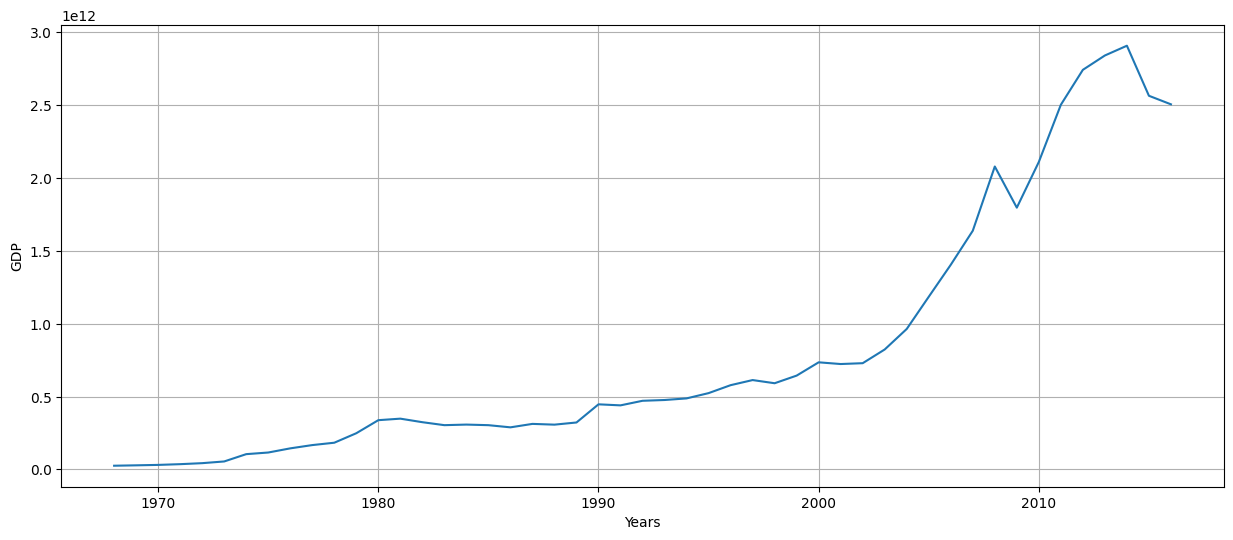

In [13]:
df_pr.plot(kind = 'line', x='Year', y ='Value',
           figsize= (15,6),
           legend = False,
           grid = True,
           ylabel = "GDP",
           xlabel = "Years")

# **GDP Analysis - GDP Growth of a Country**

In [14]:
df_pr.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [15]:
round(((2843-2576)/2576)*100,2)

10.36

In [16]:
data = df_pr.values
gdp_change = [0]
for i in range(1, len(data)):
  prev = data[i-1][3]
  cur = data[i][3]
  gdp_change.append(round(((cur-prev)/prev)*100,2))
df_pr = df_pr.assign(GDP = gdp_change)

In [17]:
df_pr

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


# **GDP Analysis - GDP Growth on whole Dataset**

In [18]:
final_data = []
for country_name in df['Country Name'].unique():
  df_pr = df[df['Country Name']== country_name]
  data = df_pr.values
  gdp_change = [0]
  for i in range(1, len(data)):
    prev = data[i-1][3]
    cur = data[i][3]
    gdp_change.append(round(((cur-prev)/prev)*100,2))
  df_pr = df_pr.assign(GDP = gdp_change)
  final_data.append(df_pr)


In [19]:
df = pd.concat(final_data, axis=0)

In [20]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [21]:
df.groupby('Country Name')['GDP'].mean().sort_values(ascending=False)

,GDP
Country Name,
Cayman Islands,108.380000
Equatorial Guinea,22.312453
Nauru,20.650000
Iraq,18.075854
Oman,17.681154
...,...
Barbados,3.109259
San Marino,2.148333
American Samoa,1.937333


In [22]:
df.groupby('Country Name').max()['Value'].sort_values(ascending=False).head(50)

,Value
Country Name,
World,7.904923e+13
High income,5.036240e+13
OECD members,4.937008e+13
Post-demographic dividend,4.673504e+13
IDA & IBRD total,2.948247e+13
Low & middle income,2.870476e+13
Middle income,2.829277e+13
IBRD only,2.739661e+13
Europe & Central Asia,2.365470e+13


# **GDP Analysis - Plotting Graphs Using Plotly**

In [23]:
!pip install plotly

In [24]:
import plotly.express as px
import plotly.offline as pyo

In [25]:
df_pr = df[df['Country Name'] == 'World']
fig = px.line(df_pr, x='Year', y='Value', title='GDP of World')

In [26]:
fig

In [27]:
df_pr = df[df['Country Name'] == 'India']
fig = px.line(df_pr, x='Year', y='Value', title='Indian GDP', range_y = [0, 8000000000000])
fig

In [28]:
pyo.plot(fig, filename = 'gdp.html')

'gdp.html'

# **GDP Analysis - Plotting Graphs in Bulk**

In [29]:
import os

* GDP of Each Country

In [35]:
for country_name in df['Country Name'].unique():
  df_pr = df[df['Country Name']==country_name]
  fig = px.line(df_pr, x = 'Year', y='Value', title = country_name+'GDP Analysis' )
  # Create the directory if it doesn't exist
  if not os.path.exists('GDP Indidual'):
      os.makedirs('GDP Indidual')
  pyo.plot(fig, filename='GDP Indidual/'+country_name+'.html')

# **GDP Analysis - Compare GDP across Countries**


In [36]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis of All Countries', color = 'Country Name')

pyo.plot(fig, filename = 'Countries GDP.html')

'Countries GDP.html'

In [37]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']


In [38]:
c2.head()


,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


In [39]:
df_pr = pd.concat([c1,c2],axis = 0)


In [40]:
df_pr

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


In [42]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & China', color = 'Country Name')

pyo.plot(fig, filename = 'IND|CHN.html')

'IND|CHN.html'

In [43]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'World']

df_pr = pd.concat([c1,c2],axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | World & China', color = 'Country Name')

pyo.plot(fig, filename = 'WLD|CHN.html')

'WLD|CHN.html'

# **GDP Analysis - Compare GDP across Countries Advanced**


In [44]:
lst = ['IND','ITA', 'USA', 'CHN']

dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])

    df_pr = pd.concat(dfs, axis = 0)

In [45]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), color = 'Country Name')

pyo.plot(fig, filename = '|'.join(lst) + '.html')

'IND|ITA|USA|CHN.html'

In [46]:
def comare_gdp(lst, isOpen):

    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)

    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst),
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)

In [47]:
comare_gdp(['IND','USA'], False)

# **GDP Analysis - Compare GDP Growth Comparison**


* GDP Growth Comparison between Specific Countries


In [48]:
def compare_gdp(lst, isOpen):

    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst),
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)

In [49]:
compare_gdp(['IND','USA','ITA','CHN'], True)


* GDP Growth Comparies of All the Countries


In [50]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'

 * GDP Growth of All Countries Graph Individual


1.   List item
2.   List item



In [51]:
os.mkdir('GDP Growth Individual')

for country_name in df['Country Code'].unique():

    df_pr = df[df['Country Code'] == country_name]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_name)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_name + '.html', auto_open = False)

* GDP Growth between 1960 - 2016


In [53]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]

    if (len(df_pr) == 57):
        dfs.append(df_pr)

df_pr = pd.concat(dfs, axis = 0)

In [54]:
df_pr


,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [55]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'